In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [40]:
x_train = pd.read_csv('x_train_zero_variance_removed.csv')

In [41]:
x_train.head()

,Reports 1 day ago,Reports 2 days ago,Reports 3 days ago,Reports 4 days ago,Reports 5 days ago,Reports 6 days ago,Reports 7 days ago,Reports 14 days ago,Reports 30 days ago,Reports 365 days ago,...,Western Addition,Westwood Highlands,Westwood Park,Yerba Buena Island,Friday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.013699,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.013699,0.000000,0.027397,0.041096,0.013699,0.041096,0.000000,0.000000,0.027397,0.025641,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.123288,0.082192,0.041096,0.013699,0.109589,0.178082,0.191781,0.041096,0.041096,0.076923,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.027397,0.041096,0.027397,0.054795,0.013699,0.013699,0.041096,0.000000,0.013699,0.012821,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.013699,0.041096,0.027397,0.013699,0.027397,0.013699,0.013699,0.000000,0.027397,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#Use Pearson Correlation to identify correlation between features in training dataset
def heat_map(data):
    plt.figure(figsize = (24, 20))
    cor = data.corr()
    sns.heatmap(cor, annot = False)
    plt.show()

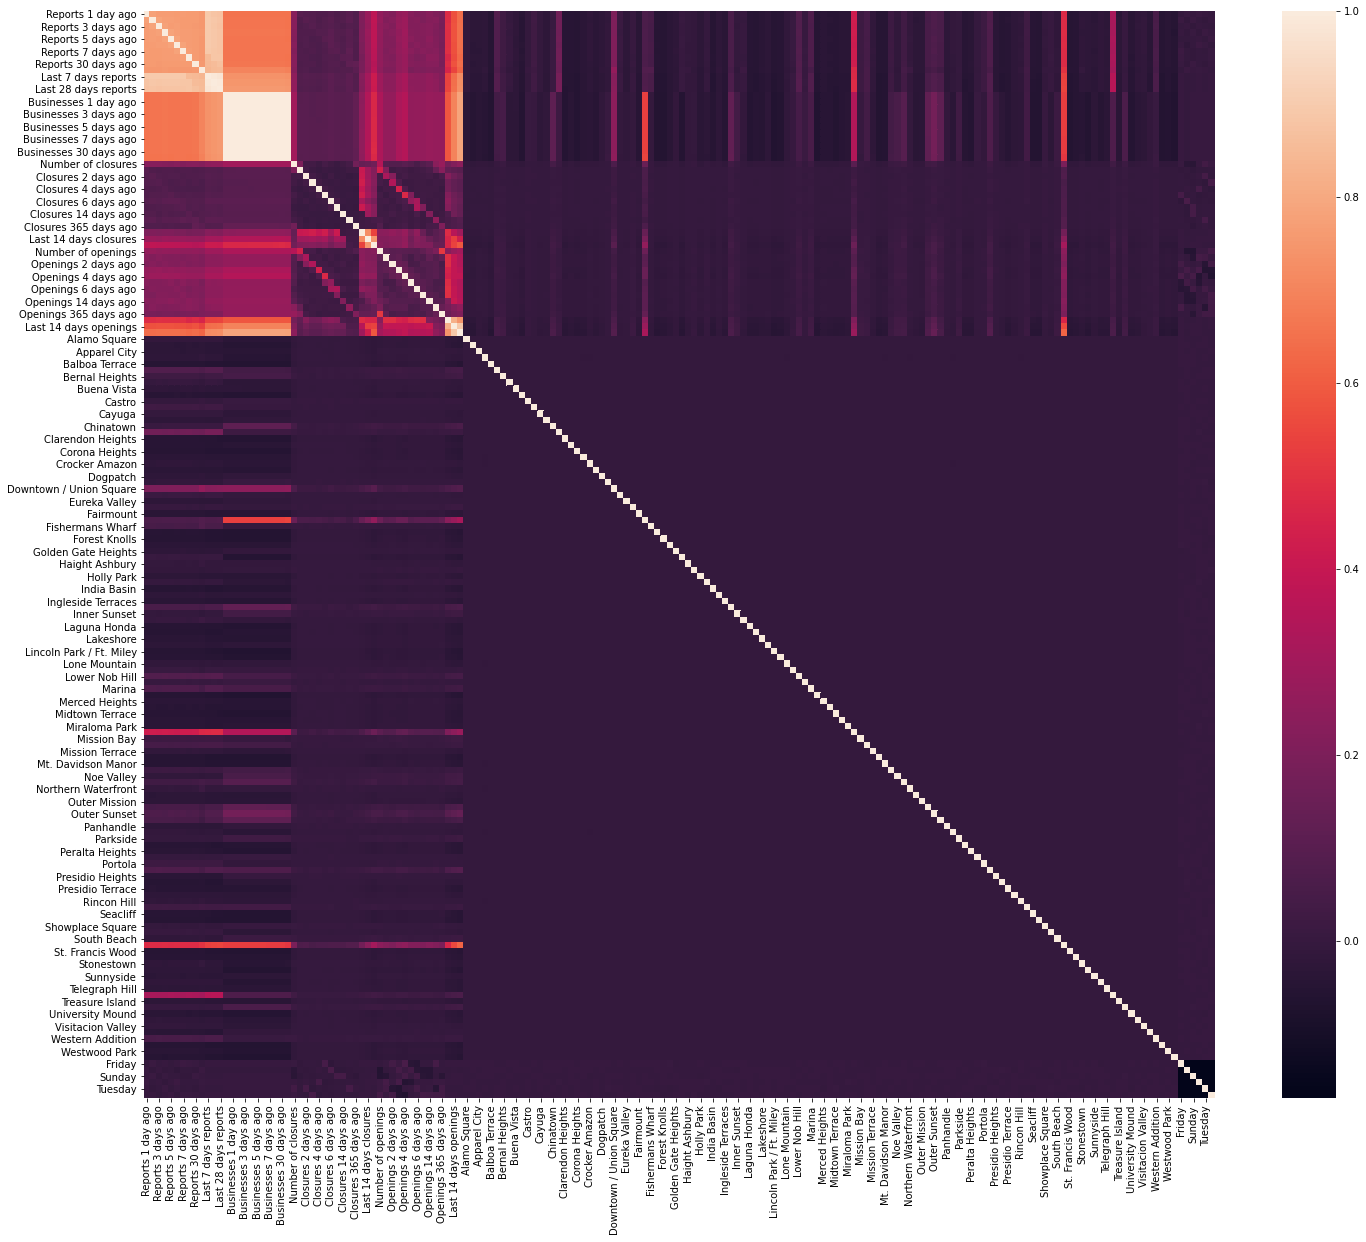

In [43]:
heat_map(x_train)

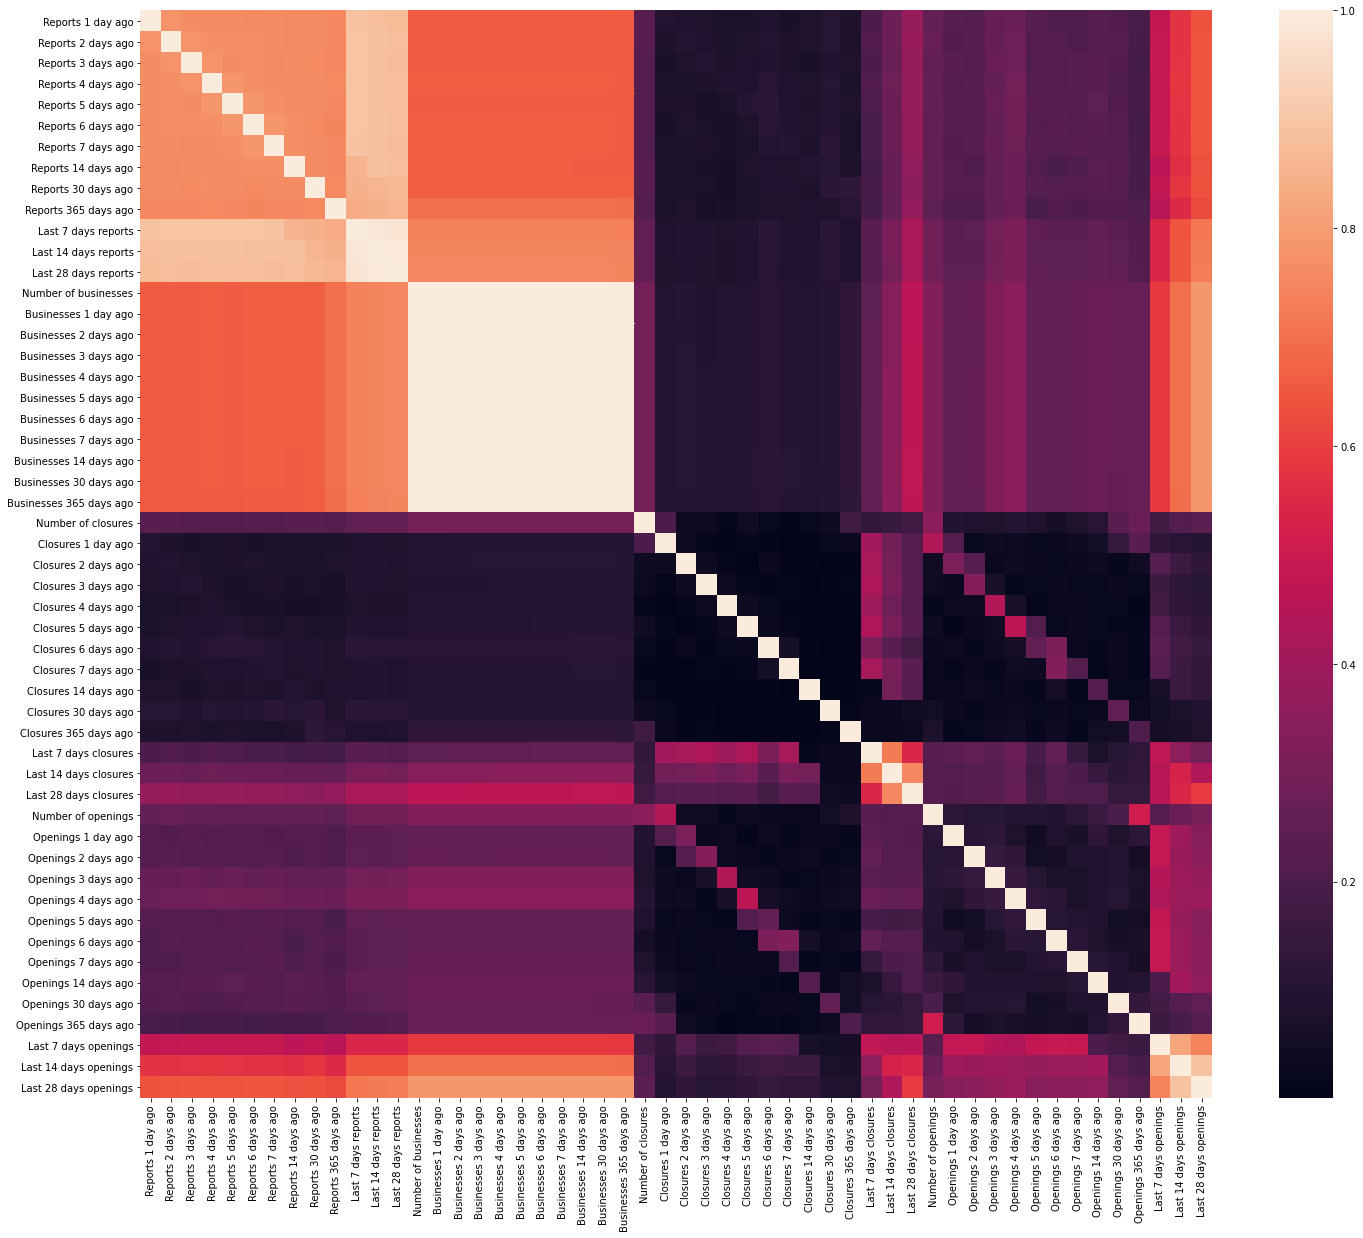

In [44]:
x_train_reduced = x_train.iloc[:, 0:52]
heat_map(x_train_reduced)

In [45]:
# iterate through every feature and determnine its correlation with each other feature
#if the correlation exceeds a set threshold, add the feature to a set of highly correlated features
cor_threshold = 0.80
cor_features = set()
cor = x_train.corr()
for i in range (len(cor.columns)):
    for j in range(i):
        if cor.iloc[i, j] > cor_threshold:
            feature = cor.columns[i]
            cor_features.add(feature)

In [46]:
print(len(cor_features),"features found which are highly correlated with one another")
print(cor_features)

15 features found which are highly correlated with one another
{'Businesses 1 day ago', 'Last 28 days reports', 'Businesses 2 days ago', 'Businesses 7 days ago', 'Businesses 5 days ago', 'Last 14 days openings', 'Businesses 3 days ago', 'Last 7 days reports', 'Businesses 365 days ago', 'Businesses 6 days ago', 'Businesses 4 days ago', 'Businesses 14 days ago', 'Last 28 days openings', 'Last 14 days reports', 'Businesses 30 days ago'}


In [47]:
x_train = x_train.drop(cor_features, axis=1)

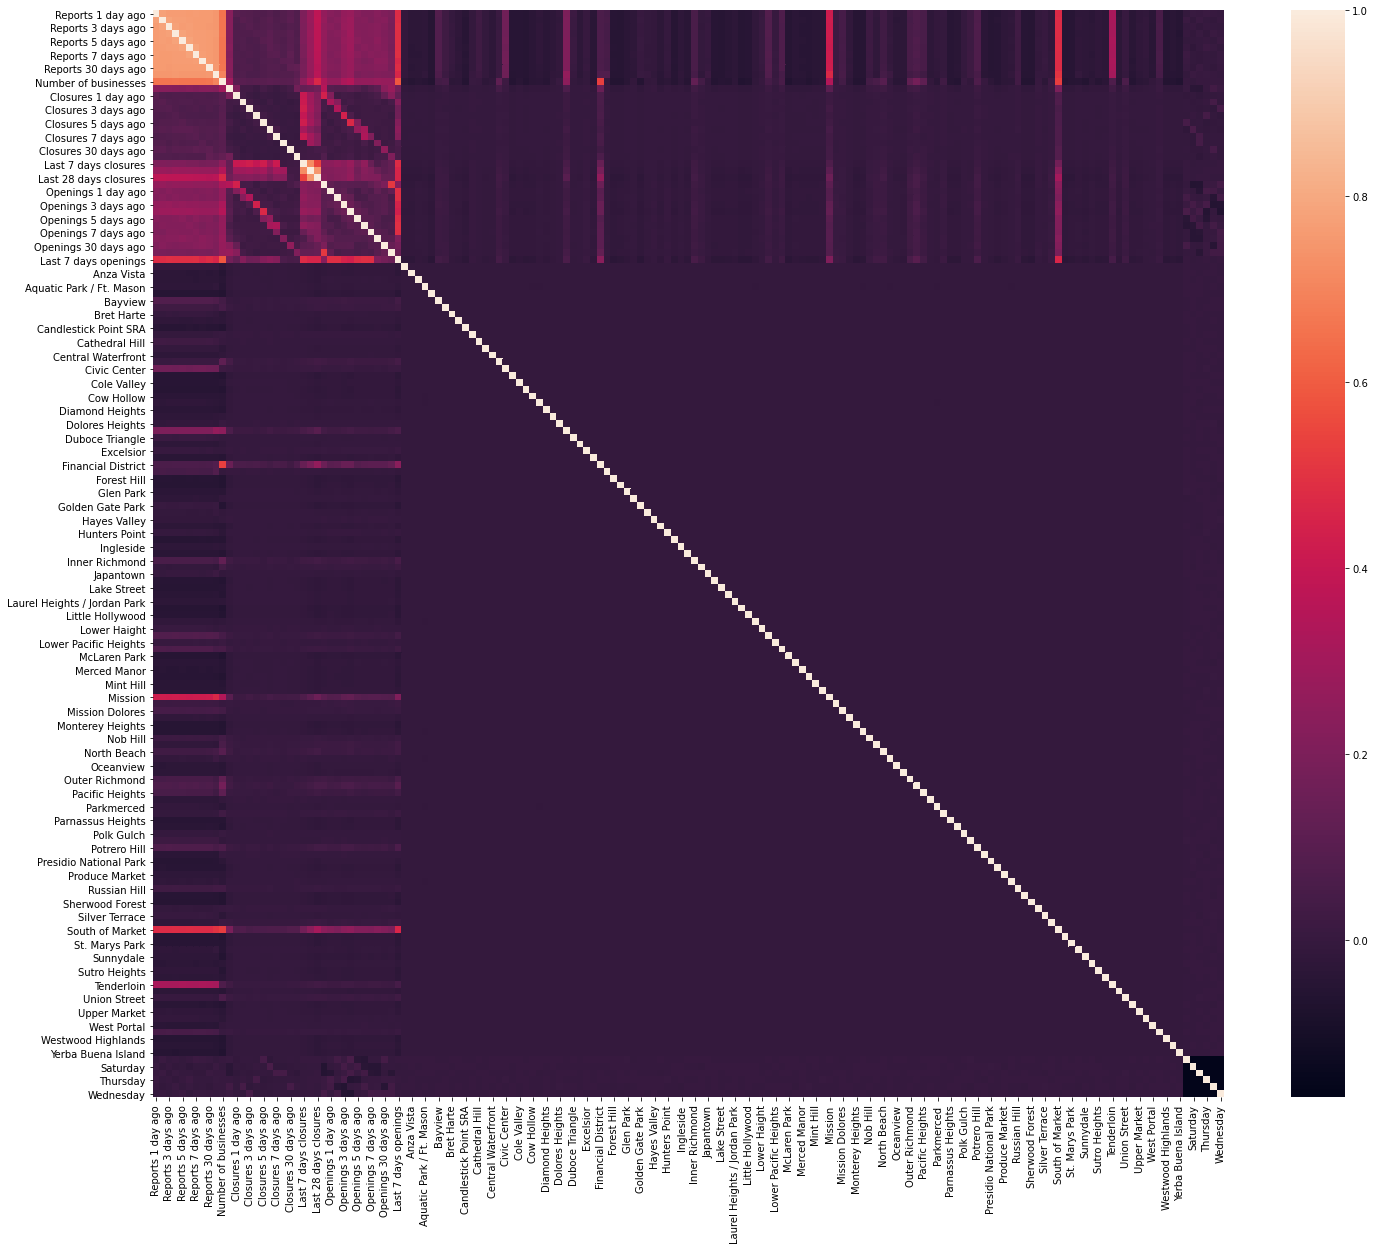

In [48]:
heat_map(x_train)

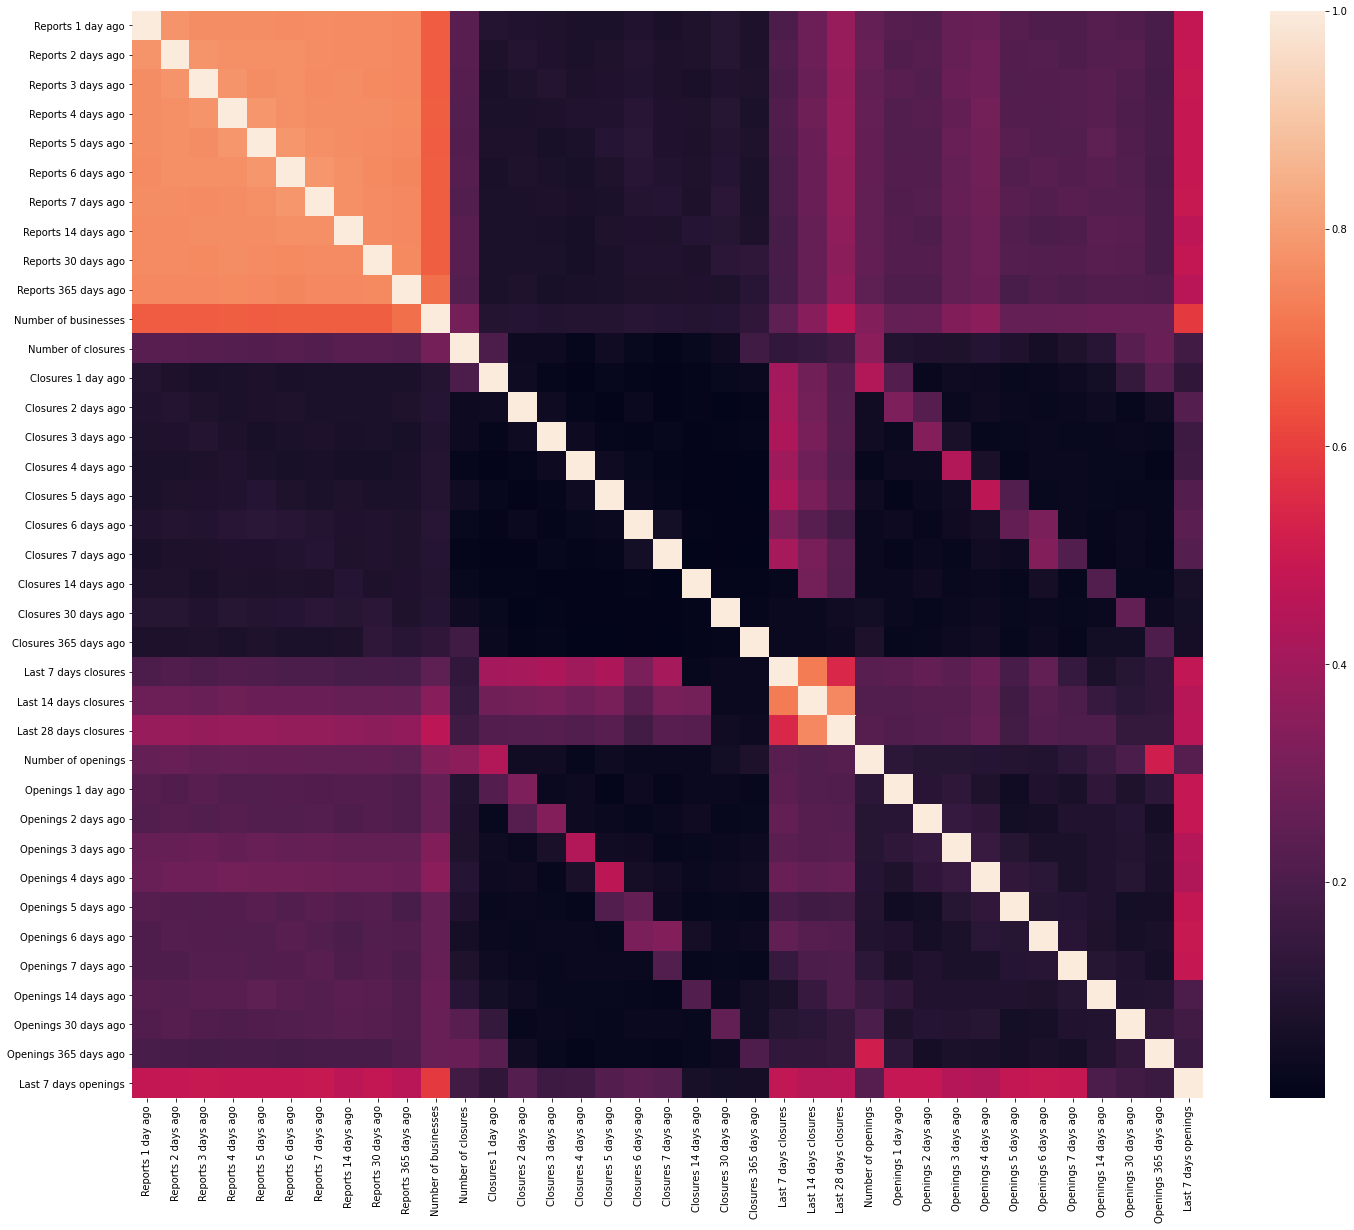

In [49]:
x_train_reduced = x_train.iloc[:, 0:37]
heat_map(x_train_reduced)

In [50]:
x_train.to_csv('x_train_high_correlation_removed.csv', index = False)